# How to implement KNN from scratch with Python

1. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
2. https://stats.stackexchange.com/questions/463499/machine-learning-kneighborsregressor-train-score-1

In [1]:
# core libs
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# charts
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Data
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc - median income in block group
HouseAge - median house age in a block group
AveRooms - the average number of rooms (provided per household)
AveBedrms - the average number of bedrooms (provided per household)
Population - block group population
AveOccup - the average number of household members
Latitude - block group latitude
Longitude - block group longitude
MedHouseVal - median house value for California districts (hundreds of thousands of dollars)

<AxesSubplot:>

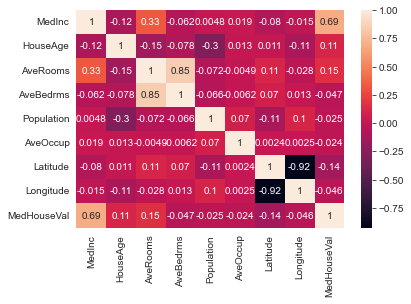

In [4]:
# Correlation
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(df.corr(), annot=True)

In [5]:
X = df.drop(['MedHouseVal'], axis=1)
y = df.MedHouseVal

In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


## Regression with K-Nearest Neighbors

In [7]:
# Split into train and test sets

from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [8]:
# Standartization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit
scaler.fit(X_train)

# Scale
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

col_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_test, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,5160.0,-0.016059,0.991671,-1.774632,-0.696956,-0.192866,0.435980,5.842113
HouseAge,5160.0,0.013795,0.991857,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,5160.0,-0.010900,1.084250,-1.895233,-0.423629,-0.089476,0.248431,52.485627
AveBedrms,5160.0,-0.001878,1.290755,-1.360290,-0.210606,-0.113563,0.001264,75.138022
Population,5160.0,-0.007072,0.962946,-1.242020,-0.564792,-0.233178,0.251557,12.857276
AveOccup,5160.0,-0.012046,0.136058,-0.154164,-0.056718,-0.023848,0.015110,6.696928
Latitude,5160.0,-0.027852,1.003589,-1.455901,-0.809192,-0.668603,0.962228,2.911728
Longitude,5160.0,0.028029,1.002011,-2.330363,-1.086840,0.556207,0.795922,2.498898


In [9]:
# Training and predicting

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)

In [10]:
# Measure result

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = mean_squared_error(y_test, predicted, squared=False)
r2 = regressor.score(X_test, y_test)

print(f'mae {mae}')
print(f'mse {mse}')
print(f'rmse {rmse}')
print(f'r2 {r2}')

mae 0.4460739527131783
mse 0.4316907430948294
rmse 0.6570317671884894
r2 0.6737569252627673


In [11]:
# Try to find best params

from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(regressor, {'n_neighbors': range(5,25)})
grid_search_cv.fit(X_train, y_train)
# regressor_2 = KNeighborsRegressor(n_neighbors=12)
# regressor_2.fit(X_train, y_train)

updated_predictions = grid_search_cv.best_estimator_.predict(X_test)
# updated_predictions = regressor_2.predict(X_test)

mae = mean_absolute_error(y_test, updated_predictions)
mse = mean_squared_error(y_test, updated_predictions)
rmse = mean_squared_error(y_test, updated_predictions, squared=False)
r2 = grid_search_cv.score(X_test, y_test)

print(f'mae {mae}')
print(f'mse {mse}')
print(f'rmse {rmse}')
print(f'r2 {r2}')

mae 0.44038533963178295
mse 0.4202432078854215
rmse 0.6482616816420831
r2 0.682408208952813


## Classification using K-Nearest Neighbors

In [12]:
# Preprocess data

df['MedHouseValCat'] = pd.qcut(df['MedHouseVal'], 4, retbins=False, labels=[1,2,3,4])

In [13]:
# Set train and test data

X = df.drop(['MedHouseValCat', 'MedHouseVal'], axis=1)
y = df.MedHouseValCat

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# Standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

In [15]:
# Training and prediction

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
grid_search_cv = GridSearchCV(clf, {'n_neighbors': range(5,15)})
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 15)})

In [16]:
# Check accuracy

grid_search_cv.best_estimator_.score(X_test, y_test)

0.6310077519379845

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.51      0.57      0.54      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.63      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.63      5160
weighted avg       0.64      0.63      0.63      5160



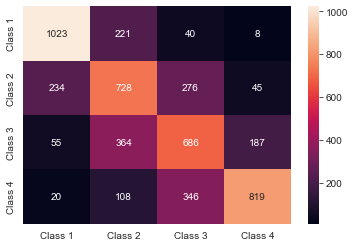

In [17]:
# More metrics about accuracy

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

predicted = grid_search_cv.best_estimator_.predict(X_test)

classes_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
cm = pd.DataFrame(confusion_matrix(y_test, predicted),
                  columns=classes_names, index=classes_names)

sn.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_test, predicted))

## Implementing KNN for Outlier Detection with Scikit-Learn

In [21]:
# Train outlier detector

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5)
nbrs.fit(X_train)

# Distances and indexes of the 5 neighbors
distances, indexes = nbrs.kneighbors(X_train)

In [24]:
# Distances

distances[:3]

array([[0.        , 0.12998939, 0.15157687, 0.16543705, 0.17750354],
       [0.        , 0.25535314, 0.37100754, 0.39090243, 0.40619693],
       [0.        , 0.27149697, 0.28024623, 0.28112326, 0.30420656]])

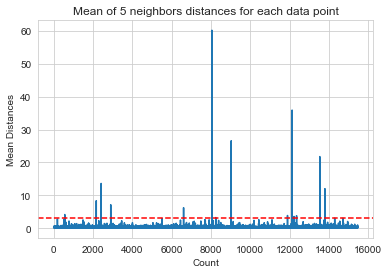

In [31]:
# Plot with mean distances of each row (point)

dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')

Everything above 3 are our outliers

In [33]:
import numpy as np
outlier_indexes = np.where(dist_means > 3)

outlier_indexes

(array([  564,  2167,  2415,  2902,  6607,  8047,  8243,  9029, 11892,
        12127, 12226, 12353, 13534, 13795, 14292, 14707]),)

In [35]:
outlier_values = df.iloc[outlier_indexes]
outlier_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
564,4.8711,27.0,5.082811,0.944793,1499.0,1.880803,37.75,-122.24,2.86600,4
2167,2.8359,30.0,4.948357,1.001565,1660.0,2.597809,36.78,-119.83,0.80300,1
2415,2.8250,32.0,4.784232,0.979253,761.0,3.157676,36.59,-119.44,0.67600,1
2902,1.1875,48.0,5.492063,1.460317,129.0,2.047619,35.38,-119.02,0.63800,1
6607,3.5164,47.0,5.970639,1.074266,1700.0,2.936097,34.18,-118.14,2.26500,3
8047,2.7260,29.0,3.707547,1.078616,2515.0,1.977201,33.84,-118.17,2.08700,3
8243,2.0769,17.0,3.941667,1.211111,1300.0,3.611111,33.78,-118.18,1.00000,1
9029,6.8300,28.0,6.748744,1.080402,487.0,2.447236,34.05,-118.78,5.00001,4
11892,2.6071,45.0,4.225806,0.903226,89.0,2.870968,33.99,-117.35,1.12500,1
12127,4.1482,7.0,5.674957,1.106998,5595.0,3.235975,33.92,-117.25,1.24600,2


### Pros and Cons of KNN

In this section, we'll present some of the pros and cons of using the KNN algorithm.

#### Pros

- It is easy to implement
- It is a lazy learning algorithm and therefore doesn't require training on all data points (only using the K-Nearest neighbors to predict). This makes the KNN algorithm much faster than other algorithms that require training with the whole dataset such as Support Vector Machines, linear regression, etc.
- Since KNN requires no training before making predictions, new data can be added seamlessly
- There are only two parameters required to work with KNN, i.e. the value of K and the distance function

#### Cons
- The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, the distance between points gets "weird", and the distance metrics we use don't hold up
- Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features